In [1]:
import pandas as pd
import networkx as nx
from math import exp
import matplotlib.pyplot as plt
import numpy as np
from itertools import count
from mpl_toolkits.basemap import Basemap as Basemap

In [2]:
nodes = pd.read_csv('routes.csv', header=None, names=['i', 'j'])
g = nx.from_pandas_edgelist(nodes, 'i', 'j', create_using=nx.DiGraph())
print('Number of nodes', g.number_of_nodes())
print('Number of edges', g.number_of_edges())

Number of nodes 151
Number of edges 3622


In [4]:
country_status = pd.read_csv('country_status.csv')
country_status.set_index('country', inplace=True)
country_status.sample(n=5)

,t=0,t=1,t=2,t=3,t=4,t=5,t=6,t=7,t=8,t=9,...,t=21,t=22,t=23,t=24,t=25,t=26,t=27,t=28,t=29,t=30
country,,,,,,,,,,,,,,,,,,,,,
Mongolia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
Fiji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
Montenegro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Israel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Bolivia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [5]:
infected_ratio = pd.read_csv('infected_ratio.csv')
infected_ratio.set_index('country', inplace=True)
infected_ratio.sample(n=5)

,t=0,t=1,t=2,t=3,t=4,t=5,t=6,t=7,t=8,t=9,...,t=21,t=22,t=23,t=24,t=25,t=26,t=27,t=28,t=29,t=30
country,,,,,,,,,,,,,,,,,,,,,
Ghana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.008176,0.009448,0.008620,0.006044,0.003154,0.001183,0.000305,0.000052,0.000005,0.0
Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,...,15.581231,17.419263,13.382158,6.422707,1.733992,0.238530,0.015481,0.000444,0.000005,3.0
Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.159482,0.157350,0.123024,0.074033,0.033174,0.010655,0.002355,0.000341,0.000030,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.022554,0.025303,0.022450,0.015329,0.007810,0.002865,0.000725,0.000121,0.000012,1.0
Thailand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,...,0.556745,0.520161,0.383193,0.215936,0.089994,0.026706,0.005403,0.000709,0.000057,3.0


In [6]:
coordinates = pd.read_csv('coordinates.csv')
coordinates.set_index('country', inplace=True)
coordinates.sample(n=5)

,lat,lng
country,,
Bosnia and Herzegovina,44.0,18.0
Jordan,31.0,36.0
Germany,51.0,9.0
Iraq,33.0,44.0
Russia,60.0,100.0


In [7]:
period = country_status.shape[1]

In [8]:
for t in range(period):
    nx.set_node_attributes(g, country_status['t='+str(t)].to_dict(), 'status'+str(t))
    nx.set_node_attributes(g, infected_ratio['t='+str(t)].to_dict(), 'infected'+str(t))

In [9]:
nodes = g.nodes() 

groups_status = []
mapping_status = []
colors_status = []

for i in range(int(period/5)+1):
    groups_status.append(set(nx.get_node_attributes(g,'status'+str(i*5)).values()))
    mapping_status.append(dict(zip(sorted(groups_status[i]),count())))
    colors_status.append([mapping_status[i][g.node[n]['status'+str(i*5)]] for n in nodes])
    
# get unique groups
groups = []
mapping = []
colors = []
for i in range(int(period/5)+1):
    groups.append(set(nx.get_node_attributes(g,'infected'+str(i*5)).values()))
    mapping.append(dict(zip(sorted(groups[i]),count())))
    colors.append([mapping[i][g.node[n]['infected'+str(i*5)]] for n in nodes])

In [70]:
groups[1]

{0.0, 0.0006768984255968941}

In [51]:
m = Basemap(projection='merc',llcrnrlon=-150,llcrnrlat=-60,urcrnrlon=150,
        urcrnrlat=70, lat_0=0, lon_0=0, resolution='l',suppress_ticks=True)

mx, my = m(coordinates['lng'].values, coordinates['lat'].values)
pos = {}
for count, i in enumerate(coordinates.index):
    pos[i] = (mx[count], my[count])

In [74]:
np.arange(0, max+0.0000000000001, step=max/5)

array([0.        , 0.00013538, 0.00027076, 0.00040614, 0.00054152,
       0.0006769 ])

For t = 0


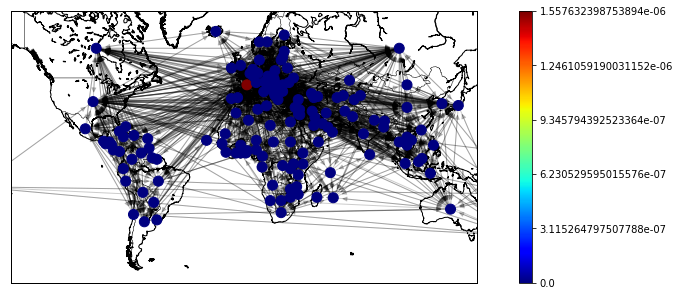

For t = 5


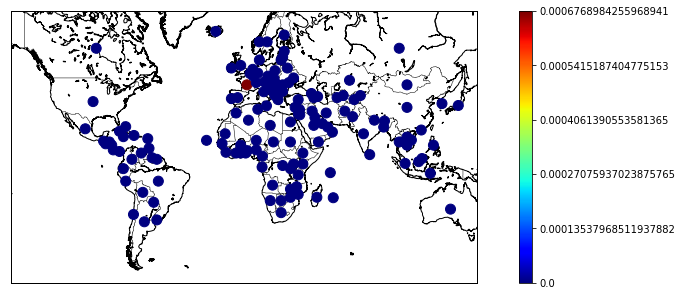

For t = 10


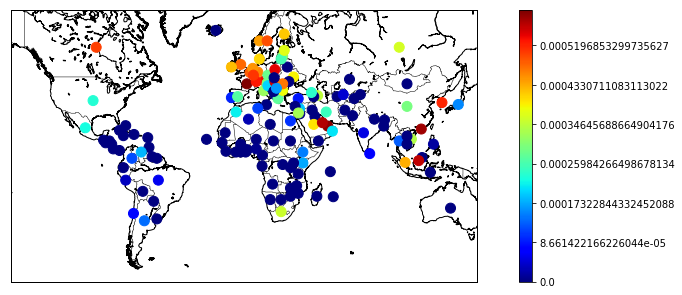

For t = 15


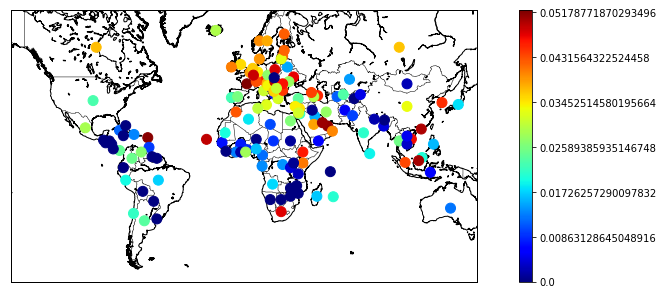

For t = 20


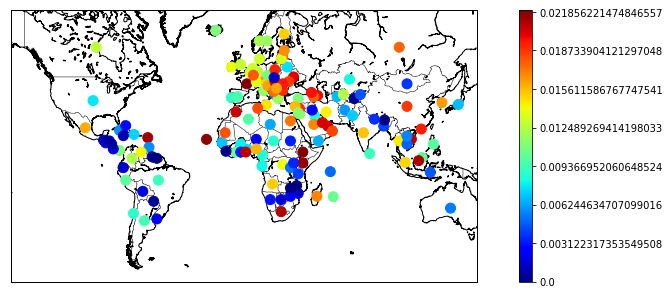

For t = 25


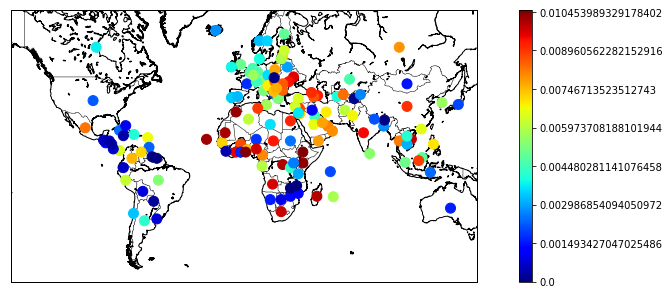

In [81]:
for i in range(int(period/5)):
    print('For t =', i*5)
    fig, ax = plt.subplots(figsize=(15,5))
    
    # draw a boundary around the map.
    m.drawmapboundary()
    # draw coastlines and countries.
    m.drawcoastlines()
    m.drawcountries()

    if i == 0:
        ec = nx.draw_networkx_edges(g, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors[i], 
                            node_size=100, cmap=plt.cm.jet)

    max = list(groups[i])[-1]
    cbar = fig.colorbar(nc)
    if i < 2:
        cbar.ax.set_yticklabels(np.arange(0, max+0.0000000000001, step=max/5))
    else:
        cbar.ax.set_yticklabels(np.arange(0, max+0.0000000000001, step=max/7))
    plt.show()

For t = 0


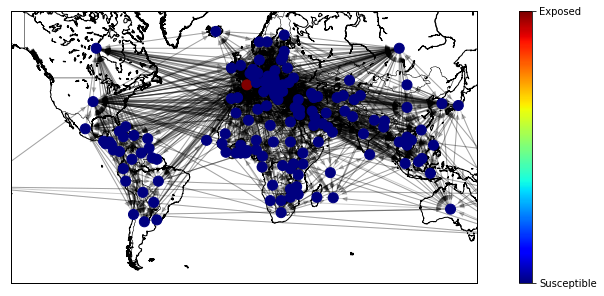

For t = 5


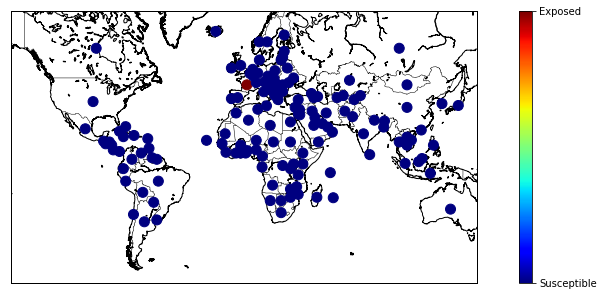

For t = 10


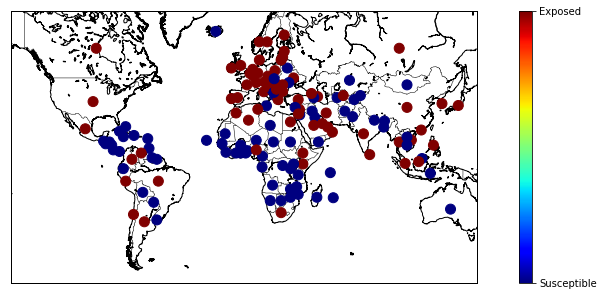

For t = 15


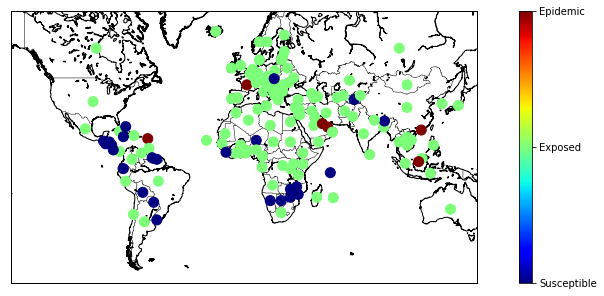

For t = 20


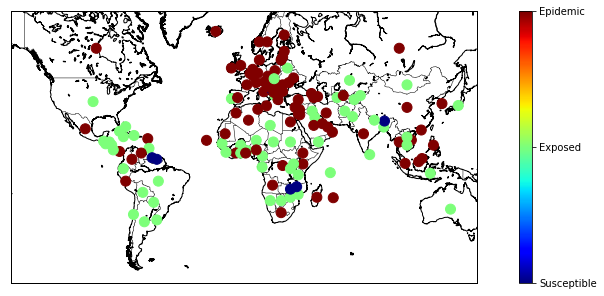

For t = 25


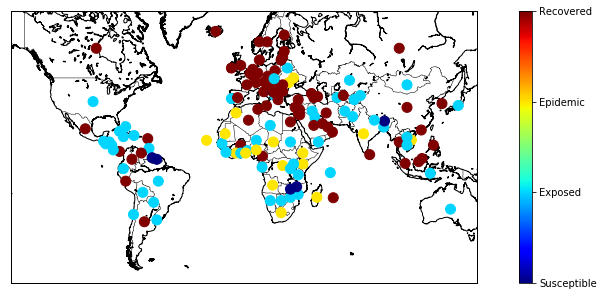

In [59]:
for i in range(int(period/5)):
    print('For t =', i*5)
    fig, ax = plt.subplots(figsize=(15,5))
    
    # draw a boundary around the map.
    m.drawmapboundary()
    # draw coastlines and countries.
    m.drawcoastlines()
    m.drawcountries()
    
    if i == 0:
        ec = nx.draw_networkx_edges(g, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors_status[i], 
                            node_size=100, cmap=plt.cm.jet)
    
    cbar = fig.colorbar(nc, ticks=[0, 1, 2, 3])
    cbar.ax.set_yticklabels(['Susceptible', 'Exposed', 'Epidemic', 'Recovered']) 

    plt.show()